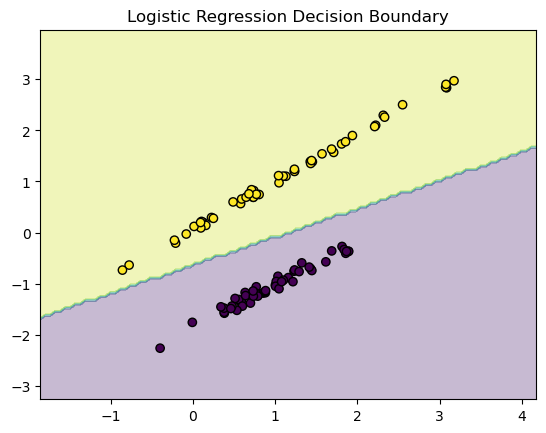

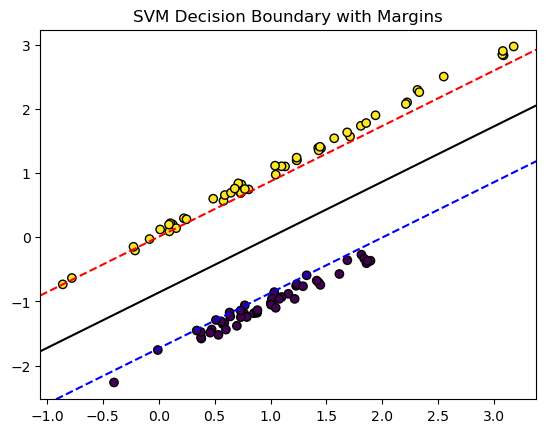

Logistic Regression Accuracy: 1.00
SVM Accuracy: 1.00


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    plt.title(title)
    plt.show()

def plot_svm_margins(model, X, y, title):
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k')
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                         np.linspace(ylim[0], ylim[1], 100))
    
    Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    ax.contour(xx, yy, Z, colors=['blue', 'black', 'red'],
               levels=[-1, 0, 1], linestyles=['dashed', 'solid', 'dashed'])
    
    plt.title(title)
    plt.show()

# Generate synthetic dataset
X, y = make_classification(n_samples=100, n_features=2, n_classes=2, n_clusters_per_class=1, n_redundant=0, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
plot_decision_boundary(log_reg, X, y, "Logistic Regression Decision Boundary")

# Support Vector Machine model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
plot_svm_margins(svm_model, X, y, "SVM Decision Boundary with Margins")

# Performance Comparison
y_pred_log = log_reg.predict(X_test)
y_pred_svm = svm_model.predict(X_test)

print(f"Logistic Regression Accuracy: {accuracy_score(y_test, y_pred_log):.2f}")
print(f"SVM Accuracy: {accuracy_score(y_test, y_pred_svm):.2f}")


 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.75      0.72      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143


SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        85
           1       0.75      0.71      0.73        58

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



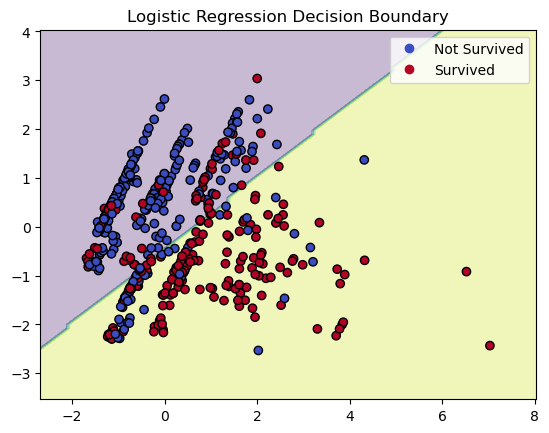

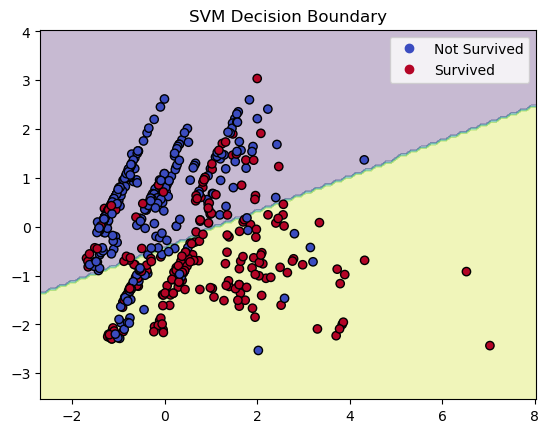

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA

## Loading the titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

## preprocessing the Data
df = df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare']]  # Select relevant features
df.dropna(inplace=True)  # Remove missing values
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})  # Encode categorical variable

# Step 3: Define Features (X) and Target (y)
X = df[['Pclass', 'Sex', 'Age', 'Fare']]
y = df['Survived']

# Step 4: Split Dataset into Train & Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 5: Standardize Features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 6: Train Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train_scaled, y_train)
y_pred_log = log_reg.predict(X_test_scaled)

# Step 7: Train Support Vector Machine (SVM)
svm_model = SVC(kernel='linear', C=1)
svm_model.fit(X_train_scaled, y_train)
y_pred_svm = svm_model.predict(X_test_scaled)

# Step 8: Evaluate Models
print(" Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))

print("\nSVM Performance:")
print(classification_report(y_test, y_pred_svm))

# Step 9: Visualize Decision Boundaries
def plot_decision_boundary(model, X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    Z = model.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, edgecolors='k', cmap='coolwarm')
    plt.legend(handles=scatter.legend_elements()[0], labels=['Not Survived', 'Survived'])
    plt.title(title)
    plt.show()

# Plot Decision Boundaries
plot_decision_boundary(log_reg, X_train_scaled, y_train, "Logistic Regression Decision Boundary")
plot_decision_boundary(svm_model, X_train_scaled, y_train, "SVM Decision Boundary")


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
df = pd.read_csv('income_evaluation.csv')

In [8]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [10]:
df.columns

Index(['age', ' workclass', ' fnlwgt', ' education', ' education-num',
       ' marital-status', ' occupation', ' relationship', ' race', ' sex',
       ' capital-gain', ' capital-loss', ' hours-per-week', ' native-country',
       ' income'],
      dtype='object')

In [13]:
df.drop(columns=' fnlwgt', inplace=True)
df.columns

Index(['age', ' workclass', ' education', ' education-num', ' marital-status',
       ' occupation', ' relationship', ' race', ' sex', ' capital-gain',
       ' capital-loss', ' hours-per-week', ' native-country', ' income'],
      dtype='object')

In [15]:
col_names = ['age', 'workclass', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names

df.columns

## we do this because the dataset seem to not have proper names in it. the column names should contain '_' and not '-'
## also some names had space in the starting, so we are doing this 

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income'],
      dtype='object')

In [16]:
## checking for the null values
df.isnull().sum()

age               0
workclass         0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [18]:
# adding new the categorical column -> preprocess of the data
bins = [16, 24, 64, 90]## so we get 16-24 one set, 24-64 one set and 64-90 one set
labels = ["young","adult","old"]
df['age_types'] = pd.cut(df['age'], bins=bins, labels=labels)
df['income_num'] = np.where(df['income'] == ' >50K', 1, 0).astype('int16')##here, if the income is >50k, we put 1, instead we put 0
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,adult,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,adult,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,adult,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,adult,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,adult,0


In [20]:
np.unique(df.education)
df.columns
strip_columns = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']

for i in strip_columns:
    df[i] = df[i].str.strip()

np.unique(df.workclass)

array(['?', 'Federal-gov', 'Local-gov', 'Never-worked', 'Private',
       'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'],
      dtype=object)

📌 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        85
           1       0.75      0.72      0.74        58

    accuracy                           0.79       143
   macro avg       0.78      0.78      0.78       143
weighted avg       0.79      0.79      0.79       143


📌 SVM Performance:
              precision    recall  f1-score   support

           0       0.81      0.84      0.82        85
           1       0.75      0.71      0.73        58

    accuracy                           0.78       143
   macro avg       0.78      0.77      0.77       143
weighted avg       0.78      0.78      0.78       143



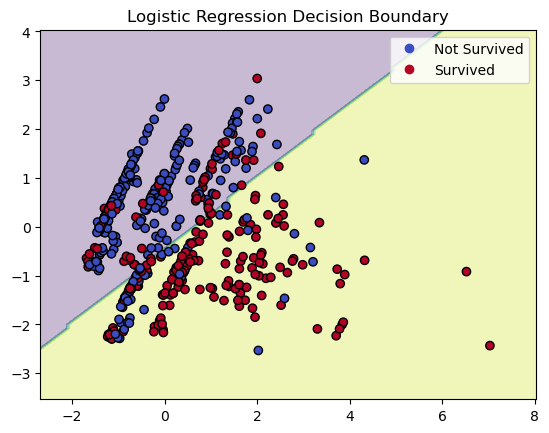

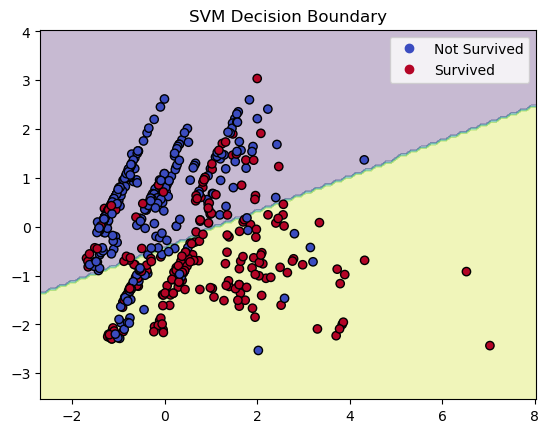

In [21]:
df.loc[df['workclass']=='?']

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
27,54,?,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K,adult,1
61,32,?,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K,adult,0
69,25,?,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K,adult,0
77,67,?,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K,old,0
106,17,?,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K,young,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K,adult,1
32531,30,?,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K,adult,0
32539,71,?,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K,old,1
32541,41,?,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K,adult,0


In [22]:
df.replace({'workclass': '?', 'occupation': '?', 'native_country': '?'}, np.NaN, inplace=True)
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [23]:
df.isnull().sum()

age                  0
workclass         1836
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     583
income               0
age_types            0
income_num           0
dtype: int64

In [24]:
from sklearn.preprocessing import LabelEncoder
def label_encoder(a):
    le = LabelEncoder()
    df[a] = le.fit_transform(df[a])

df.columns

Index(['age', 'workclass', 'education', 'education_num', 'marital_status',
       'occupation', 'relationship', 'race', 'sex', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'income',
       'age_types', 'income_num'],
      dtype='object')

In [25]:
label_list = ['workclass', 'education','marital_status',
       'occupation', 'relationship', 'race', 'sex','native_country', 'income']
for i in label_list:
    label_encoder(i)
    
df.head()

,age,workclass,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income,age_types,income_num
0,39,6,9,13,4,0,1,4,1,2174,0,40,38,0,adult,0
1,50,5,9,13,2,3,0,4,1,0,0,13,38,0,adult,0
2,38,3,11,9,0,5,1,4,1,0,0,40,38,0,adult,0
3,53,3,1,7,2,5,0,2,1,0,0,40,38,0,adult,0
4,28,3,9,13,2,9,5,2,0,0,0,40,4,0,adult,0


In [1]:
conda update scikit-learn imbalanced-learn

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=101)
X_res, y_res = smote.fit_resample(X, y)  # Now X_res and y_res are properly defined

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20, random_state=101, shuffle=True)

SyntaxError: invalid syntax (2973303601.py, line 1)